# Axial Spread Evaluation

Evaluation of the axial spread of the atom cloud for different values of the axial gtrap frequency, and comparision with the Depth of Focus of the microscope objective used in the setup.

In [2]:
# Simulation of Atoms Dynamics into Tweezer + Imaging. Consider the 3 degrees of freedom instead of the axial and radial one 
import os


working_directory = "D:/PhD_Trieste/Simulations/Imaging_Simulation"

if os.getcwd()!= working_directory:
    os.chdir(working_directory)  
    
print(working_directory)

import Simulations_Libraries.trajectory_library as trajlib
import numpy as np
import matplotlib.pyplot as plt
from Camera import *
from scipy.stats import poisson
from scipy.optimize import curve_fit
import Simulations_Libraries.general_library as genlib
import scipy.constants as const
from tqdm import tqdm
#%matplotlib



D:/PhD_Trieste/Simulations/Imaging_Simulation


D:\Anaconda\envs\Imaging_Simulation\Lib\site-packages\numba\core\decorators.py:248: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


## General

In [3]:
 # General Parameters
isotope = 171
baseAtom = trajlib.Ytterbium(0,0,0, 0,0,0,isotope=isotope)


# Microscope Objective parameters

NA = 0.6
refractiveIndex = 1 
wavelength = baseAtom.transitions[0].Lambda
DoF = refractiveIndex*wavelength/(NA**2)


freeFlightTime = 0e-6


In [4]:
# General Check 

initialT = 100e-6 # initial temperature
baseFreq_a = 29e3 #np.sqrt((29e3)**2 + (60e3)**2) #if we want to put light sheet
trapFreq_a = 2*np.pi*baseFreq_a

n_0Axial = trajlib.n_T(trapFreq_a,initialT)
z_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreq_a)*(2*n_0Axial+1))
z_rms_AfterFree_FlightTime = np.sqrt(initialT*trajlib.kB/baseAtom.m) * np.sqrt((1/trapFreq_a**2) + (freeFlightTime**2))

print('DoF =', np.round(DoF*1e6,2),'um')
print('sigma_z =', np.round(z_rms_AfterFree_FlightTime*1e6,2),'um')

DoF = 1.11 um
sigma_z = 0.38 um


## Tweezer Parameter

In [5]:
initialT = np.array([10,20,50,100])*1e-6

tweezerAxialFreq = 29e3

lightSheetFreq = np.arange(2,61,1)*1e3
trapFreq_a = 2*np.pi*np.sqrt(tweezerAxialFreq**2 + lightSheetFreq**2)

z_rms_AfterFFT = []

for i in range(len(initialT)):
    z_rms_AfterFFT.append(np.sqrt(initialT[i]*trajlib.kB/baseAtom.m) * np.sqrt((1/trapFreq_a**2) + (freeFlightTime**2)))

z_rms_AfterFFT = np.asarray(z_rms_AfterFFT)

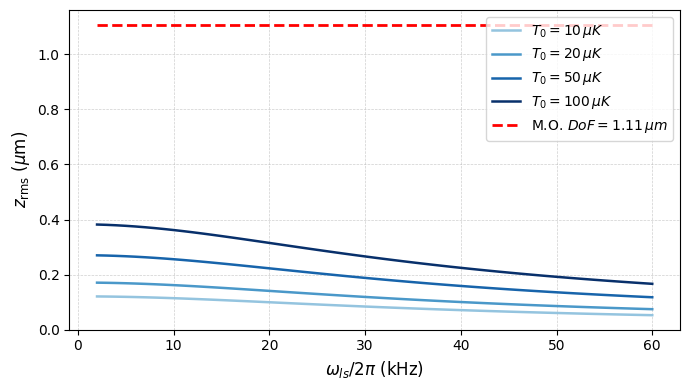

In [6]:


plt.figure(figsize=(7, 4))


# Create colormap
cmap = plt.cm.Blues
colors = cmap(np.linspace(0.4, 1, len(initialT)))

for spectrum, T0, color in zip(z_rms_AfterFFT, initialT, colors):
    plt.plot(
        lightSheetFreq / 1e3,          # kHz
        spectrum * 1e6,            # µm
        color=color,
        linewidth=1.8,
        label=rf"$T_0 = {T0*1e6:.0f}\,\mu K$"
    )

# Horizontal DoF line
plt.hlines(
    y=DoF * 1e6,                                # µm (match y-axis units)
    xmin=np.min(lightSheetFreq / 1e3),
    xmax=np.max(lightSheetFreq / 1e3),
    colors='red',
    linestyles='--',
    linewidth=2,
    label=rf"M.O. $DoF = {DoF*1e6:.2f}\,\mu m$"
)

plt.xlabel(r"$\omega_{ls} / 2\pi$ (kHz)", fontsize=12)
plt.ylabel(r"$z_{\mathrm{rms}}$ ($\mu$m)", fontsize=12)

plt.legend(frameon=True, fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()


# ODT Parameters

In [7]:
initialT = np.array([10,20,50,100])*1e-6

ODTAxialFreq = 2.7e3

lightSheetFreq = np.arange(0,61,1)*1e3
trapFreq_a = 2*np.pi*np.sqrt(ODTAxialFreq**2 + lightSheetFreq**2)

z_rms_AfterFFT = []

for i in range(len(initialT)):
    z_rms_AfterFFT.append(np.sqrt(initialT[i]*trajlib.kB/baseAtom.m) * np.sqrt((1/trapFreq_a**2) + (freeFlightTime**2)))

z_rms_AfterFFT = np.asarray(z_rms_AfterFFT)

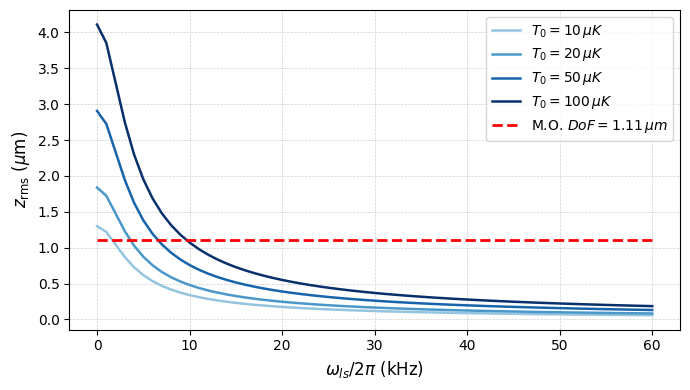

In [8]:


plt.figure(figsize=(7, 4))


# Create colormap
cmap = plt.cm.Blues
colors = cmap(np.linspace(0.4, 1, len(initialT)))

for spectrum, T0, color in zip(z_rms_AfterFFT, initialT, colors):
    plt.plot(
        lightSheetFreq / 1e3,          # kHz
        spectrum * 1e6,            # µm
        color=color,
        linewidth=1.8,
        label=rf"$T_0 = {T0*1e6:.0f}\,\mu K$"
    )

# Horizontal DoF line
plt.hlines(
    y=DoF * 1e6,                                # µm (match y-axis units)
    xmin=np.min(lightSheetFreq / 1e3),
    xmax=np.max(lightSheetFreq / 1e3),
    colors='red',
    linestyles='--',
    linewidth=2,
    label=rf"M.O. $DoF = {DoF*1e6:.2f}\,\mu m$"
)

plt.xlabel(r"$\omega_{ls} / 2\pi$ (kHz)", fontsize=12)
plt.ylabel(r"$z_{\mathrm{rms}}$ ($\mu$m)", fontsize=12)

plt.legend(frameon=True, fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()


# ODT Parameters considering an elliptic beam and no light sheet

In [9]:
initialT = np.array([10,20,50,100])*1e-6

ODTAxialFreq = 2.7e3

k  = np.arange(1,21,0.1)
trapFreq_a = 2*np.pi*ODTAxialFreq*k

z_rms_AfterFFT = []

for i in range(len(initialT)):
    z_rms_AfterFFT.append(np.sqrt(initialT[i]*trajlib.kB/baseAtom.m) * np.sqrt((1/trapFreq_a**2) + (freeFlightTime**2)))

z_rms_AfterFFT = np.asarray(z_rms_AfterFFT)

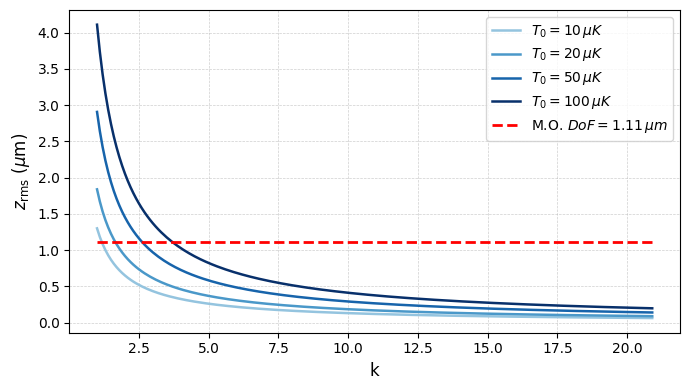

In [10]:


plt.figure(figsize=(7, 4))


# Create colormap
cmap = plt.cm.Blues
colors = cmap(np.linspace(0.4, 1, len(initialT)))

for spectrum, T0, color in zip(z_rms_AfterFFT, initialT, colors):
    plt.plot(
        k,          
        spectrum * 1e6,            # µm
        color=color,
        linewidth=1.8,
        label=rf"$T_0 = {T0*1e6:.0f}\,\mu K$"
    )

# Horizontal DoF line
plt.hlines(
    y=DoF * 1e6,                                # µm (match y-axis units)
    xmin=np.min(k),
    xmax=np.max(k),
    colors='red',
    linestyles='--',
    linewidth=2,
    label=rf"M.O. $DoF = {DoF*1e6:.2f}\,\mu m$"
)

plt.xlabel(r"k", fontsize=12)
plt.ylabel(r"$z_{\mathrm{rms}}$ ($\mu$m)", fontsize=12)

plt.legend(frameon=True, fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()


# Spread along the three directions of the cloud considering an elliptic waist 

In [11]:
initialT = np.array([10,20]) * 1e-6

k  = np.arange(1,21,0.1)
#k  = np.arange(4,13,0.1)
freeFlightTime = 0
ODTXFreq = 2 * np.pi*30 * np.sqrt( (1 + k**4) / 2)
ODTYFreq = 2 * np.pi * 2.7e3  
ODTZFreq = 2 * np.pi * 2.7e3 * k 



x_rms = []
y_rms = []
z_rms = []

for i in range(len(initialT)):
    x_rms.append(np.sqrt(initialT[i]*trajlib.kB/baseAtom.m) * np.sqrt((1/ODTXFreq**2) + (freeFlightTime**2)))
    y_rms.append(np.ones(len(k))*np.sqrt(initialT[i]*trajlib.kB/baseAtom.m) * np.sqrt((1/ODTYFreq**2) + (freeFlightTime**2)))
    z_rms.append(np.sqrt(initialT[i]*trajlib.kB/baseAtom.m) * np.sqrt((1/ODTZFreq**2) + (freeFlightTime**2)))

x_rms = np.asarray(x_rms)
y_rms = np.asarray(y_rms)
z_rms = np.asarray(z_rms)

FoV =  62.1 um


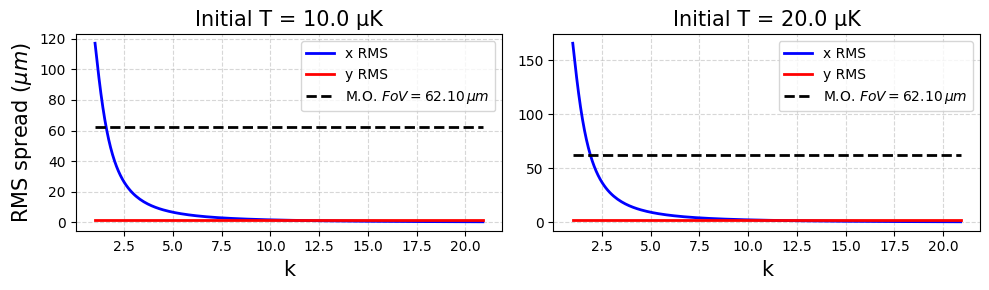

In [22]:
# Prepare figure
fig, axes = plt.subplots(1,len(initialT), figsize=(5*len(initialT),3), sharex=True)

pixelSize = 4.6e-6
magnification = 8
conversionFactor = pixelSize/magnification

FieldOfVieWObjective = 108* conversionFactor
print('FoV = ',np.round(FieldOfVieWObjective*1e6,2), 'um')

if len(initialT) == 1:
    axes = [axes]  # make it iterable if only one temperature

for i, T in enumerate(initialT):

    ax = axes[i]
    ax.plot(k, x_rms[i,:]*1e6, label='x RMS', color='blue', lw=2)
    ax.plot(k, y_rms[i,:]*1e6, label='y RMS', color='red', lw=2)

    # Horizontal DoF line
    ax.hlines(
        y=FieldOfVieWObjective*1e6,                                # µm (match y-axis units)
        xmin=np.min(k),
        xmax=np.max(k),
        colors='black',
        linestyles='--',
        linewidth=2,
        label=rf"M.O. $FoV = {FieldOfVieWObjective*1e6:.2f}\,\mu m$"
        )
    
    
    ax.set_xlabel('k', fontsize=15)
    ax.set_title(f'Initial T = {T*1e6:.1f} μK', fontsize=15)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

axes[0].set_ylabel(r'RMS spread ($\mu m$)', fontsize=15)

    
plt.tight_layout()